In [1]:
import os
os.chdir("../")
os.getcwd()

'/home/richy/another_instance/dl-model-extraction'

In [2]:
from attacker.query import *
from attacker.utils import *
from victim.__init__ import *

set_seed(42)

# Query victim model & Train attacker model

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])
# initialize attacker model
model = get_model(config["attacker"], outputs)
# train attacker model
_ = training(model, trainloader, testloader)

save_visualize(None, _,'title' )

In [ ]:
# get dataset in dataloader
trainloader, testloader, outputs = get_dataloader(config["victim"]["data"])

# query & save test data
querytestloader = query_victim(config["victim"], outputs, testloader, len(testloader.dataset), train=False)

# query train data
querytrainloader = query_victim(config["victim"], outputs, trainloader, config["query_size"], q_type=config["query_type"])

# initialize attacker model
attacker = get_model(config["attacker"], outputs)

# train attacker model
attacker_result = training(attacker, querytrainloader, querytestloader)

# save & visualize model inference
title = f'Trial-A_{config["attacker"]}_{config["victim"]["model_name"]}_{config["victim"]["data"]}{config["query_type"]}_{config["query_size"]}'
percent = save_visualize(attacker, attacker_result,title )
results_dict={"Victim":config["victim"]["model_name"],
                "Dataset":config["victim"]["data"],
                "QueryType": config["query_type"],
                "QuerySize": config["query_size"],
                "Queried Output": 'Labels',
                "Attacker": config["attacker"],
                "Train Loss": percent[0],
                "Train Accuracy": percent[1],
                "Test Loss": percent[2],
                "Test Accuracy": percent[3]}
print(results_dict)

# Parameters

In [3]:
# dan VM
parameters = {
        "query_size": [20000],
        "query_type": ['coreset'],
        "victim":[{ "data": CIFAR_10, "model_name": RESNET34}],
        "attacker":[RESNET34, RESNET50, VGG19_BN]
}

# Investigations

config={'batch_size': 500, 'learning_rate': 0.008, 'lr_cycles': 2, 'lr_steps': 1000, 'base_lr': 1e-05, 'max_lr': 0.1, 'query_size': 50000, 'query_type': 'coreset', 'victim': {'data': 'cifar_10', 'model_name': 'resnet50'}, 'attacker': 'resnet34'}

parameters={'query_size': [20000], 'query_type': ['coreset'], 'victim': [{'data': 'cifar_10', 'model_name': 'resnet34'}], 'attacker': ['resnet34', 'resnet50', 'vgg19_bn']}

---------------------------------------------------------------------------


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified
Query resnet34 victim on cifar_10 dataset
    - input:10000 queried:10000
Sample using None with query size 10000
    - input:10000 sampled:10000
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet34 Attacker: resnet34------------
---------------Query Type: coreset Query Size: 20000-------------------
Query resnet34 victim on cifar_10 dataset
    - input:50000 queried:50000
Sample using coreset with query size 20000
    - input:50000 sampled:20000
Total epochs: 100
epoch 1
    - train_acc 0.45985 train_loss 1.31325
    - test_acc  0.28600 test_loss  1.82076
epoch 2
    - train_acc 0.51440 train_loss 1.58038
    - test_acc  0.14020 test_loss  21.75332
epoch 3
    - train_acc 0.48010 train_loss 1.72444
    - test_acc  0.04730 test_loss  544.84619
epoch 4
    - train_acc 0.49345 

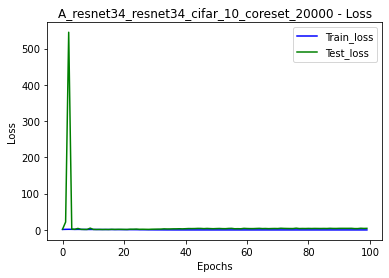

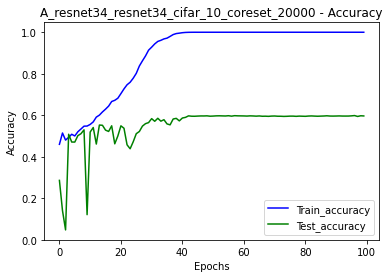

{'Victim': 'resnet34', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 20000, 'Queried Output': 'Labels', 'Attacker': 'resnet34', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 4.3161, 'Test Accuracy': 59.66}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet34 Attacker: resnet50------------
---------------Query Type: coreset Query Size: 20000-------------------
Loading queried cifar_10 dataset with resnet34 victim
    - input:50000 queried:50000
Sample using coreset with query size 20000
    - input:50000 sampled:20000
Total epochs: 100
epoch 1
    - train_acc 0.43710 train_loss 1.51231
    - test_acc  0.48470 test_loss  1.76762
epoch 2
    - train_acc 0.46960 train_loss 2.11250
    - test_acc  0.27140 test_loss  186.52908
epoch 3
    - train_acc 0.49770 train_loss 1.46

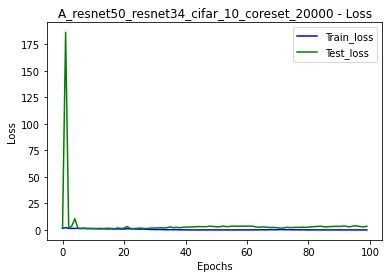

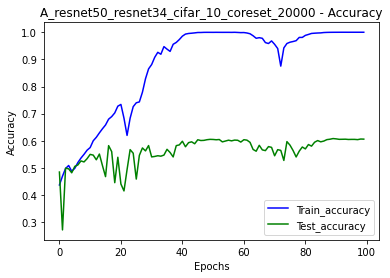

{'Victim': 'resnet34', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 20000, 'Queried Output': 'Labels', 'Attacker': 'resnet50', 'Train Loss': 0.0, 'Train Accuracy': 100.0, 'Test Loss': 3.4361, 'Test Accuracy': 60.6}
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
-----------------------Dataset: cifar_10----------------------------
--------Victim: resnet34 Attacker: vgg19_bn------------
---------------Query Type: coreset Query Size: 20000-------------------
Loading queried cifar_10 dataset with resnet34 victim
    - input:50000 queried:50000
Sample using coreset with query size 20000
    - input:50000 sampled:20000
Total epochs: 100
epoch 1
    - train_acc 0.42960 train_loss 1.69496
    - test_acc  0.48030 test_loss  1.74005
epoch 2
    - train_acc 0.46570 train_loss 1.74628
    - test_acc  0.48030 test_loss  2.07336
epoch 3
    - train_acc 0.45430 train_loss 6.14063

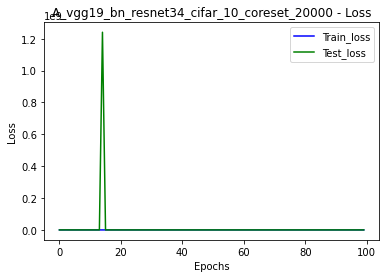

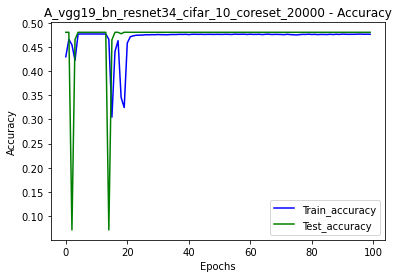

{'Victim': 'resnet34', 'Dataset': 'cifar_10', 'QueryType': 'coreset', 'QuerySize': 20000, 'Queried Output': 'Labels', 'Attacker': 'vgg19_bn', 'Train Loss': 1.6845, 'Train Accuracy': 47.61, 'Test Loss': 1.6735, 'Test Accuracy': 48.03}
-----------------------------------------------------------------------------


In [4]:
print(f'config={config}\n\nparameters={parameters}\n')
Results = []
# Iterate through Victim Model & Dataset
for victim in parameters["victim"]:
    print('---------------------------------------------------------------------------')
    # get dataset in dataloader
    trainloader, testloader, outputs = get_dataloader(victim["data"])

    # query test data
    querytestloader = query_victim(victim, outputs, testloader, len(testloader.dataset), train=False)

    # Iterate through Attacker Model
    for attacker_type in parameters["attacker"]:
        # Iterate Through Query Type
        for querytype in parameters["query_type"]:
            # Iterate Through Query Size
            for size in parameters["query_size"]:
                print('-----------------------------------------------------------------------------')
                print(f'-----------------------Dataset: {victim["data"]}----------------------------')
                print(f'--------Victim: {victim["model_name"]} Attacker: {attacker_type}------------')
                print(f'---------------Query Type: {querytype} Query Size: {size}-------------------')

                # query train data
                querytrainloader = query_victim(victim, outputs, trainloader, size, q_type=querytype)

                # initialize attacker model
                attacker = get_model(attacker_type, outputs)

                # train attacker model
                attacker_result = training(attacker, querytrainloader, querytestloader)

                # save & visualize model inference
                title = f'A_{attacker_type}_{victim["model_name"]}_{victim["data"]}_{querytype}_{size}'
                percent = save_visualize(attacker, attacker_result,title )
                results_dict={"Victim":victim["model_name"],
                                "Dataset":victim["data"],
                                "QueryType": querytype,
                                "QuerySize": size,
                                "Queried Output": 'Labels',
                                "Attacker": attacker_type,
                                "Train Loss": percent[0],
                                "Train Accuracy": percent[1],
                                "Test Loss": percent[2],
                                "Test Accuracy": percent[3]}

                print(results_dict)
                Results.append(results_dict)
                print('-----------------------------------------------------------------------------')

In [5]:
Results

[{'Victim': 'resnet34',
  'Dataset': 'cifar_10',
  'QueryType': 'coreset',
  'QuerySize': 20000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet34',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 4.3161,
  'Test Accuracy': 59.66},
 {'Victim': 'resnet34',
  'Dataset': 'cifar_10',
  'QueryType': 'coreset',
  'QuerySize': 20000,
  'Queried Output': 'Labels',
  'Attacker': 'resnet50',
  'Train Loss': 0.0,
  'Train Accuracy': 100.0,
  'Test Loss': 3.4361,
  'Test Accuracy': 60.6},
 {'Victim': 'resnet34',
  'Dataset': 'cifar_10',
  'QueryType': 'coreset',
  'QuerySize': 20000,
  'Queried Output': 'Labels',
  'Attacker': 'vgg19_bn',
  'Train Loss': 1.6845,
  'Train Accuracy': 47.61,
  'Test Loss': 1.6735,
  'Test Accuracy': 48.03}]